In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings 
from scipy.stats import boxcox # library for boxcox transformation
from scipy.stats import shapiro
import seaborn as sns
from scipy.stats import yeojohnson
from scipy import stats #for statestical and hypothetical tesing

In [33]:
data=pd.read_excel(r'C:/Users/Admin/1  Bharat Digital Python files(Udaanous)/13-05-25/practice_data.xlsx')
data

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   EmployeeID                     31 non-null     int64 
 1   gender                         31 non-null     object
 2   department                     31 non-null     object
 3   Days Present                   31 non-null     int64 
 4   Accuracy of Work               31 non-null     object
 5   Meeting Project Deadlines      31 non-null     object
 6   Task Completion Rates          31 non-null     int64 
 7   Interpersonal Skills Rating    31 non-null     int64 
 8   Decision-Making Skills Rating  31 non-null     int64 
 9   Sales Revenue Generated        31 non-null     int64 
 10  churned                        31 non-null     object
dtypes: int64(6), object(5)
memory usage: 2.8+ KB


# Boxcox transformation

The Box-Cox transformation is a statistical technique used to stabilize variance and make a dataset more normally distributed. It's particularly useful when you're preparing data for modeling techniques that assume normality (like linear regression).

Goal

Minimizes the skewness of the data

Makes the data approximately normally distributed

Improves performance and interpretability of statistical models

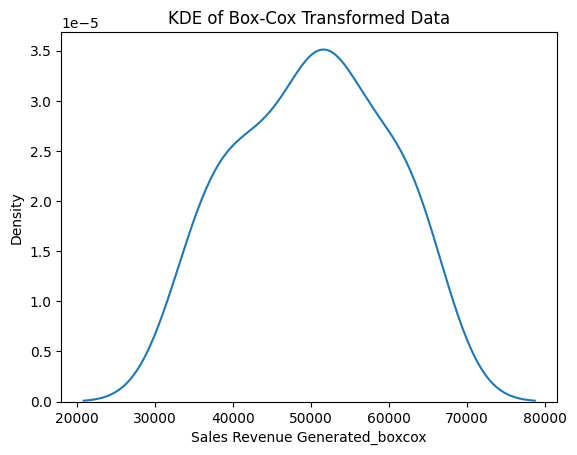

P value: 0.11875057965517044


,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,Task Completion Rates_boxcox,Sales Revenue Generated_boxcox,Task Completion Rates_yeojohnson
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,374.513461,34964.503277,391.399056
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,406.049226,64563.975893,424.142150
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,343.732887,63006.058112,359.444686
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,313.734945,60760.889953,328.306987
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,374.513461,43127.118957,391.399056


In [61]:

def boxcox_transformation(data, column_name):
    transformed_data, _ = boxcox(data[column_name])
    data[f'{column_name}_boxcox'] = transformed_data
    stat, p_value = shapiro(data[f'{column_name}_boxcox'])

    sns.kdeplot(data[f'{column_name}_boxcox'])
    plt.title('KDE of Box-Cox Transformed Data')
    plt.show()

    return p_value

# Usage
column_name = 'Sales Revenue Generated'
p_value = boxcox_transformation(data, column_name)
print('P value:', p_value)
data.head()

Since p = 0.118 > 0.05, you fail to reject H₀, 
meaning the Box-Cox transformed data appears to be normally distributed (at the 5% significance level).
1)Data is approximately normal after the Box-Cox transformation.
2) The transformation seems successful in normalizing the data.

-------------------------------------------------------------------------------------------------------------

# Yeo-Johnson transformation

The Yeo-Johnson transformation is a statistical technique similar to the Box-Cox transformation, but with an important advantage:

It can handle zero and negative values, unlike Box-Cox which requires strictly positive data.

Purpose
The Yeo-Johnson transformation aims to:

Stabilize variance (reduce heteroscedasticity)

Make data more normally distributed

Prepare data for modeling techniques that assume normality (e.g., linear regression)

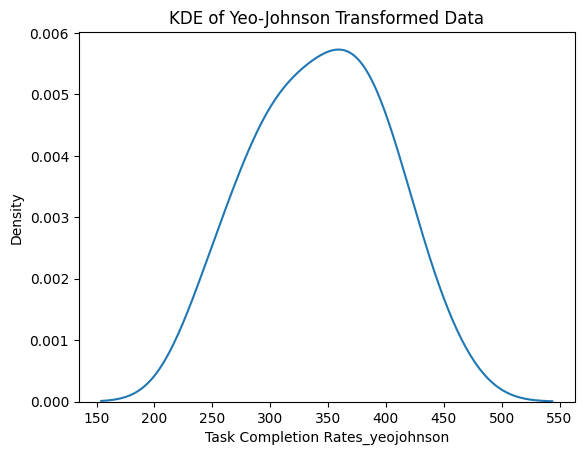

P value: 0.347298800945282


In [62]:
def yeojohnson_transformation(data, column_name):
    transformed_data, _ = yeojohnson(data[column_name])
    data[f'{column_name}_yeojohnson'] = transformed_data
    stat, p_value = shapiro(data[f'{column_name}_yeojohnson'])
    kdeplot = sns.kdeplot(data[f'{column_name}_yeojohnson'])
    plt.title('KDE of Yeo-Johnson Transformed Data')
    plt.show()

    return p_value

# Usage
column_name = 'Task Completion Rates'
p_value = yeojohnson_transformation(data, column_name)
print('P value:', p_value)


Since 0.347 > 0.05, you fail to reject the null hypothesis.

This means there is no significant evidence that the transformed data is not normal.

So,  Yeo-Johnson transformation worked well — the data now appears approximately normal.

In [63]:
data.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,Task Completion Rates_boxcox,Sales Revenue Generated_boxcox,Task Completion Rates_yeojohnson
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,374.513461,34964.503277,391.399056
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,406.049226,64563.975893,424.142150
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,343.732887,63006.058112,359.444686
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,313.734945,60760.889953,328.306987
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,374.513461,43127.118957,391.399056


# One Way Anova

One-way ANOVA (Analysis of Variance) is a statistical test used to determine whether there are significant differences in the means of three or more independent groups. It helps you decide if the variation in a dependent variable is explained by the independent variable (grouping factor).

Key Concepts:
Null Hypothesis (H₀): The means of all groups are equal.

Alternative Hypothesis (H₁): At least one group mean is different from the others.

When to Use One-Way ANOVA:
When you have one categorical independent variable (with three or more levels/groups) and a continuous dependent variable.

For example, testing if the average sales revenue differs across different departments (Sales, Marketing, Engineering, etc.).


Steps in One-Way ANOVA:
State hypotheses:

H₀: The means of the groups are equal.

H₁: At least one group mean is different.

Perform the ANOVA test.

Interpret the p-value:

If the p-value is less than 0.05 (or chosen significance level), reject the null hypothesis.

If the p-value is greater than 0.05, fail to reject the null hypothesis.

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   EmployeeID                     31 non-null     int64  
 1   gender                         31 non-null     object 
 2   department                     31 non-null     object 
 3   Days Present                   31 non-null     int64  
 4   Accuracy of Work               31 non-null     object 
 5   Meeting Project Deadlines      31 non-null     object 
 6   Task Completion Rates          31 non-null     int64  
 7   Interpersonal Skills Rating    31 non-null     int64  
 8   Decision-Making Skills Rating  31 non-null     int64  
 9   Sales Revenue Generated        31 non-null     int64  
 10  churned                        31 non-null     object 
 11  Task Completion Rates_boxcox   31 non-null     float64
dtypes: float64(1), int64(6), object(5)
memory usage: 3.0

In [36]:
data.head(10)

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,Task Completion Rates_boxcox
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,374.513461
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,406.049226
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,343.732887
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,313.734945
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,374.513461
5,6,Male,Sales,21,High,Yes,95,8,8,89988,No,438.315196
6,7,Female,Marketing,24,Low,No,70,5,4,70934,Yes,284.549945
7,8,Male,Human Resources,18,Medium,Yes,80,6,6,96578,No,343.732887
8,9,Male,Engineering,20,High,Yes,90,8,7,74219,No,406.049226
9,10,Female,Finance,22,Medium,Yes,85,7,6,87009,Yes,374.513461


We want to see whether there is any difference in the average
frequency of Sales revenue generated by the employee from various department.

In [40]:
Sales = data.query('department == "Sales"')['Sales Revenue Generated']
Marketing = data.query('department == "Marketing"')['Sales Revenue Generated']
Human_Resources = data.query('department == "Human Resources"')['Sales Revenue Generated']
Engineering = data.query('department == "Engineering"')['Sales Revenue Generated']
Finance = data.query('department == "Finance"')['Sales Revenue Generated']

t_statistic, p_value = stats.f_oneway(Sales, Marketing, Human_Resources, Engineering,Finance )
print("P-value:", p_value)

P-value: 0.8947071127613276


Since 0.89 > 0.05, you fail to reject the null hypothesis.

 This means there is no statistically significant difference in Sales Revenue Generated across the departments.

# One sample T Test

A One-Sample t-test is a statistical test used to determine if the mean of a sample is significantly different from a known or hypothesized population mean. It's typically used when you have one sample and you want to compare its mean against a specific value (e.g., a target or known population average).

In [71]:
actual_mean = data['Sales Revenue Generated'].mean()
print("Sample Mean:", actual_mean)

t_statistic, p_value = stats.ttest_1samp(data['Sales Revenue Generated'], actual_mean)

print("P-value:", p_value)

alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference between the Sales Revenue Generated and ", actual_mean)
else:
    print("Fail to reject the null hypothesis. There is no significant difference between the Sales Revenue Generated and ", actual_mean)

Sample Mean: 75115.74193548386
P-value: 1.0
Fail to reject the null hypothesis. There is no significant difference between the Sales Revenue Generated and  75115.74193548386


# Independent Sample t test

An Independent Sample t-test (also known as the Two-Sample t-test) is used to compare the means of two independent groups to determine if there is a statistically significant difference between them. It is commonly used when you have two separate groups, such as two different departments, two different treatments, or two distinct conditions, and you want to know if their means are different.

In [72]:

churned_emp = data.query('churned == "Yes"')['Sales Revenue Generated']
existing_emp = data.query('churned == "No"')['Sales Revenue Generated']
t_statistic, p_value = stats.ttest_ind(churned_emp, existing_emp)
print("P-value:", p_value)

alpha = 0.05
if p_value < alpha:
        print('Reject the null hypothesis. There is a significant difference in Sales Revenue Generated between churned and existing employee.')
else:
          print('Fail to reject the null hypothesis. There is no significant difference in Sales Revenue Generated between churned and existing Employee.')

P-value: 0.5653556952507652
Fail to reject the null hypothesis. There is no significant difference in Sales Revenue Generated between churned and existing Employee.


In [64]:
data.head()

,EmployeeID,gender,department,Days Present,Accuracy of Work,Meeting Project Deadlines,Task Completion Rates,Interpersonal Skills Rating,Decision-Making Skills Rating,Sales Revenue Generated,churned,Task Completion Rates_boxcox,Sales Revenue Generated_boxcox,Task Completion Rates_yeojohnson
0,1,Male,Sales,20,High,Yes,85,8,7,51638,No,374.513461,34964.503277,391.399056
1,2,Female,Marketing,22,Medium,Yes,90,7,6,97797,Yes,406.049226,64563.975893,424.142150
2,3,Male,Human Resources,25,High,No,80,9,8,95341,No,343.732887,63006.058112,359.444686
3,4,Male,Engineering,19,Low,Yes,75,6,5,91806,No,313.734945,60760.889953,328.306987
4,5,Female,Finance,23,Medium,Yes,85,7,7,64247,Yes,374.513461,43127.118957,391.399056
